# Course 1

# Final Algorithm

In [77]:
import pandas as pd

In [141]:
df = pd.read_csv('imdb-reviews-pt-br.csv')

In [142]:
map_sentiment = {'neg': 0,
                'pos': 1}

In [143]:
df['class'] = df['sentiment'].map(map_sentiment)

In [144]:
df.head()

,id,text_en,text_pt,sentiment,class
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [145]:
def clean_column(df: pd.DataFrame, dirty_column: str, clean_column: str) -> pd.DataFrame:
    from nltk import tokenize
    token_pontuacao = tokenize.WordPunctTokenizer()

    from string import punctuation
    punctuation_list = list(punctuation)

    from nltk.corpus import stopwords
    stop_words = stopwords.words('portuguese')

    import unidecode
    stop_words_without_accent = [unidecode.unidecode(word) for word in stop_words]

    stop_words = stop_words + punctuation_list + stop_words_without_accent
    
    from nltk import RSLPStemmer
    stemmer = RSLPStemmer()

    clean_phrases = list()
    for line in df[dirty_column]:
        new_phrase = list()
        tokens = token_pontuacao.tokenize(line)
        new_phrase = [stemmer.stem(unidecode.unidecode(token).lower()) for token in tokens if token not in stop_words]
        #for token in tokens:
        #    new_phrase = [token if token not in stop_words]
        clean_phrases.append(' '.join(new_phrase))
    
    df[clean_column] = clean_phrases

In [146]:
clean_column(df, dirty_column = 'text_pt', clean_column = 'clean_text')

In [192]:
df.head()

,id,text_en,text_pt,sentiment,class,clean_text
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,mais vez sr costn arrum film temp necessari al...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,est exempl motiv maior film aca mesm gener cha...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,nem beatl pud escrev music tod gost emb walt h...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,film fot lata palavr apropri verdad tant ous s...


In [148]:
def generate_bag_of_words(df, text_column, max_features):
    from sklearn.feature_extraction.text import CountVectorizer
    count_vectorizer = CountVectorizer(lowercase=True, max_features=max_features)
    bag_of_words = count_vectorizer.fit_transform(df[text_column])
    return bag_of_words

In [209]:
bag_of_words = generate_bag_of_words(
    df=df, 
    text_column='clean_text', 
    max_features=1000)

In [210]:
def generate_tfidf(df, text_column, max_features):
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf = TfidfVectorizer(lowercase=False, max_features=max_features)
    features_tfidf = tfidf.fit_transform(df[text_column])
    #features = pd.DataFrame(features.todense(), columns=tfidf.get_feature_names())
    return features

In [211]:
features = generate_tfidf(
    df=df, 
    text_column='clean_text', 
    max_features=1000)

In [227]:
def generate_splited_texts(representation, df, class_column, test_size, random_state):
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(
        representation, 
        df[class_column],
        test_size=test_size,
        random_state=random_state
        )
    return x_train, x_test, y_train, y_test

In [228]:
x_train, x_test, y_train, y_test = generate_splited_texts(
    representation=bag_of_words,
    df=df, 
    class_column='class', 
    test_size=0.2, 
    random_state=200)

In [229]:
def classify_text(x_train,
                  x_test,
                  y_train,
                  y_test,
                  max_iter):    
    from sklearn.linear_model import LogisticRegression
    logistic_regression = LogisticRegression(solver='lbfgs', max_iter=max_iter)
    logistic_regression.fit(x_train, y_train)
    accuracy  = logistic_regression.score(x_test, y_test)
    print(f'ACURÁCIA: {accuracy}')

In [230]:
classify_text(
    x_train=x_train, 
    x_test=x_test,
    y_train=y_train,
    y_test=y_test,
    max_iter=1000)

ACURÁCIA: 0.8594824100283057


In [224]:
df = df
text_column = 'clean_text'
class_column = 'class'
test_size=0.2
random_state=100
max_features = 1000
max_iter = 200
train_dataset=x_train 
class_dataset=y_train 

In [233]:
def pipeline_classify_text_bag(
    df: pd.DataFrame, 
    text_column: str, 
    class_column: str, 
    train_dataset: pd.DataFrame, 
    class_dataset: pd.DataFrame, 
    test_size: float, 
    random_state: int, 
    max_features: int, 
    max_iter: int) -> None:
    
    bag_of_words = generate_bag_of_words(df, text_column, max_features)
    
    x_train, x_test, y_train, y_test = generate_splited_texts(
        representation=bag_of_words,
        df=df, 
        class_column=class_column, 
        test_size=test_size, 
        random_state=random_state)
    
    classify_text(x_train, x_test, y_train, y_test, max_iter)

In [234]:
pipeline_classify_text_bag(
    df, 
    text_column, 
    class_column, 
    train_dataset, 
    class_dataset, 
    test_size, 
    random_state, 
    max_features, 
    max_iter)

ACURÁCIA: 0.8582693085321472


In [235]:
def pipeline_classify_text_tfidf(
    df: pd.DataFrame, 
    text_column: str, 
    class_column: str, 
    train_dataset: pd.DataFrame, 
    class_dataset: pd.DataFrame, 
    test_size: float, 
    random_state: int, 
    max_features: int, 
    max_iter: int) -> None:
    
    features = generate_tfidf(df=df, text_column=text_column, max_features=max_features)
    
    x_train, x_test, y_train, y_test = generate_splited_texts(
        representation=features,
        df=df, 
        class_column=class_column, 
        test_size=test_size, 
        random_state=random_state)
    
    classify_text(x_train, x_test, y_train, y_test, max_iter)

In [236]:
pipeline_classify_text_tfidf(
    df, 
    text_column, 
    class_column, 
    train_dataset, 
    class_dataset, 
    test_size, 
    random_state, 
    max_features, 
    max_iter)

ACURÁCIA: 0.8621107966033158


In [205]:
def generate_word_cloud(df):
    %matplotlib inline
    from wordcloud import WordCloud
    all_words = ' '.join([ text for text in df ])
    
    word_cloud = WordCloud(
        width=800,
        height=500,
        max_font_size=110,
        collocations=False)
    
    word_cloud = word_cloud.generate(text=all_words)
    
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10,7))

    plt.imshow(
        word_cloud, 
        interpolation='bilinear')
    plt.axis('off')
    plt.show()

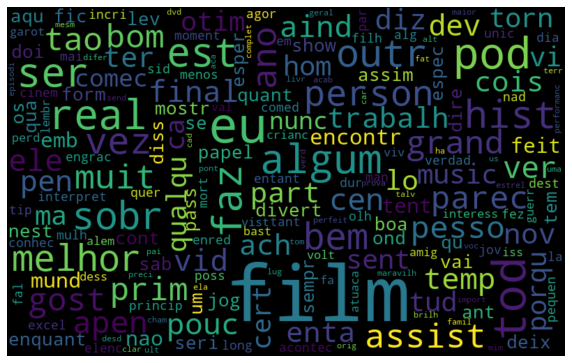

In [158]:
generate_word_cloud(
    df[df['sentiment'] == 'pos']['clean_text'])

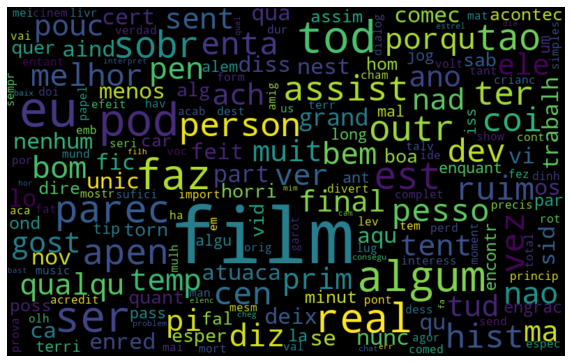

In [159]:
generate_word_cloud(
    df[df['sentiment'] == 'neg']['clean_text'])

# Exploration

In [1]:
import pandas as pd

In [2]:
reviews = pd.read_csv('imdb-reviews-pt-br.csv')

In [3]:
reviews.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
map_sentiment = {'neg': 0,
                'pos': 1}

In [5]:
reviews['class'] = reviews['sentiment'].map(map_sentiment)

In [6]:
reviews.head()

,id,text_en,text_pt,sentiment,class
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


# Data Exploration

In [7]:
reviews['class'].value_counts()

0    24765
1    24694
Name: class, dtype: int64

# Bag of Words
Creates a Sparse Matrix that contains the frequency that the words occurs in vocabulary

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

The argument `max_feature` delimites the max number of words that will form the Bag of Words matrix. It will choose automatically the most relevant words

In [125]:
count_vectorizer = CountVectorizer(lowercase=True, max_features=10000)

In [126]:
bag_of_words = count_vectorizer.fit_transform(reviews['text_pt'])

In [127]:
bag_of_words

<49459x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 5880050 stored elements in Compressed Sparse Row format>

In [128]:
count_vectorizer.get_feature_names()

['00',
 '000',
 '10',
 '100',
 '1000',
 '101',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1920',
 '1930',
 '1931',
 '1932',
 '1933',
 '1934',
 '1936',
 '1938',
 '1939',
 '1940',
 '1941',
 '1942',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1951',
 '1953',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1963',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '21',
 '22',
 '23',
 '24',
 '25',
 '250',
 '26',
 '27',
 '28',
 '2ª',
 '30',
 '300',
 '3000',
 '35',
 '37',
 '3d',
 '40',
 '45',
 '50',
 '500',
 '60',
 '70',
 '73',
 '75',
 '80',
 '85',
 '90',
 '95',
 '98',
 

In [86]:
df_esparso = pd.SparseDataFrame(bag_of_words, columns = count_vectorizer.get_feature_names())

C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  """Entry point for launching an IPython kernel.
C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\sparse\frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),


In [87]:
df_esparso.head()

C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3456: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return klass(values, index=self.index, name=items, fastpath=True)
C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\sparse\frame.py:745: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=self._default_fill_value,
C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\sparse\frame.py:721: FutureWarning: SparseDataFrame is deprecated and will be removed in a fut

,00,000,10,100,11,12,13,14,15,16,...,ônibus,última,últimas,último,últimos,única,únicas,único,únicos,útil
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data split in train and test dataset

In [104]:
from sklearn.model_selection import train_test_split

In [129]:
reviews_train, reviews_test, class_train, class_test = train_test_split(
    bag_of_words, 
    reviews['class'],
    test_size=0.2,
    random_state=42
    )

# Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
logistic_regression = LogisticRegression(solver='lbfgs', max_iter=1000)

In [132]:
logistic_regression.fit(reviews_train, class_train)
accuracy  = logistic_regression.score(reviews_test, class_test)

C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [133]:
print(accuracy)

0.8669632025879499


In [136]:
def classify_text(df, text_column, class_column, max_features, test_size, max_iter):
    from sklearn.feature_extraction.text import CountVectorizer
    count_vectorizer = CountVectorizer(lowercase=True, max_features=max_features)
    bag_of_words = count_vectorizer.fit_transform(df[text_column])
    
    from sklearn.model_selection import train_test_split
    reviews_train, reviews_test, class_train, class_test = train_test_split(
        bag_of_words, 
        df[class_column],
        test_size=test_size,
        random_state=42
        )
    
    from sklearn.linear_model import LogisticRegression
    logistic_regression = LogisticRegression(solver='lbfgs', max_iter=max_iter)
    logistic_regression.fit(reviews_train, class_train)
    accuracy  = logistic_regression.score(reviews_test, class_test)
    print(f'ACURÁCIA: {accuracy}')

In [137]:
classify_text(
    df = reviews,
    text_column='text_pt',
    class_column='class',
    max_features=200,
    test_size=0.2,
    max_iter=200)

ACURÁCIA: 0.7675899716942984


In [138]:
classify_text(
    df = reviews,
    text_column='text_pt',
    class_column='class',
    max_features=100,
    test_size=0.2,
    max_iter=200)

ACURÁCIA: 0.7122927618277396


In [139]:
classify_text(
    df = reviews,
    text_column='text_pt',
    class_column='class',
    max_features=1000,
    test_size=0.2,
    max_iter=200)

ACURÁCIA: 0.8527092600080873


C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [140]:
classify_text(
    df = reviews,
    text_column='text_pt',
    class_column='class',
    max_features=5000,
    test_size=0.2,
    max_iter=200)

ACURÁCIA: 0.8680752122927619


C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# WordCloud

In [41]:
%matplotlib inline

In [42]:
from wordcloud import WordCloud

In [49]:
all_words = ' '.join([ text for text in reviews['text_pt'] ])

In [70]:
word_cloud = WordCloud(
    width=800,
    height=500,
    max_font_size=110,
    collocations=False)

In [71]:
word_cloud = word_cloud.generate(text=all_words)

In [72]:
import matplotlib.pyplot as plt

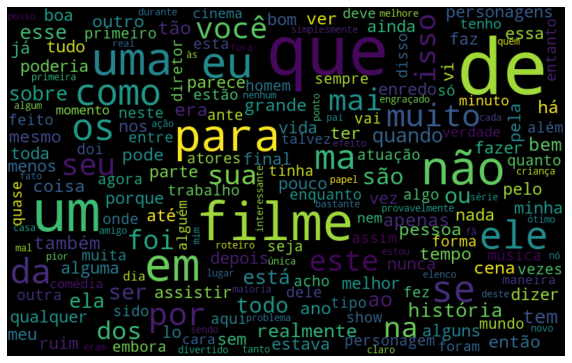

In [73]:
plt.figure(figsize=(10,7))

plt.imshow(
    word_cloud, 
    interpolation='bilinear')
plt.axis('off')
plt.show()

In [75]:
reviews[reviews['sentiment'] == 'pos']

,id,text_en,text_pt,sentiment,class
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [80]:
reviews[reviews['sentiment'] == 'neg']['text_pt']

0        Mais uma vez, o Sr. Costner arrumou um filme p...
1        Este é um exemplo do motivo pelo qual a maiori...
2        Primeiro de tudo eu odeio esses raps imbecis, ...
3        Nem mesmo os Beatles puderam escrever músicas ...
4        Filmes de fotos de latão não é uma palavra apr...
                               ...                        
37113    No final do filme, senti que era muito técnico...
37114    Este é o tipo de filme que meus inimigos me as...
37115    Eu vi Descent na noite passada no Stockholm Fi...
37116    Alguns filmes que você escolhe por um quilo sã...
37117    Este é um dos filmes mais idiotas que já vi. E...
Name: text_pt, Length: 24765, dtype: object

In [77]:
def generate_word_cloud(df):
    %matplotlib inline
    from wordcloud import WordCloud
    all_words = ' '.join([ text for text in df ])
    
    word_cloud = WordCloud(
        width=800,
        height=500,
        max_font_size=110,
        collocations=False)
    
    word_cloud = word_cloud.generate(text=all_words)
    
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10,7))

    plt.imshow(
        word_cloud, 
        interpolation='bilinear')
    plt.axis('off')
    plt.show()
    

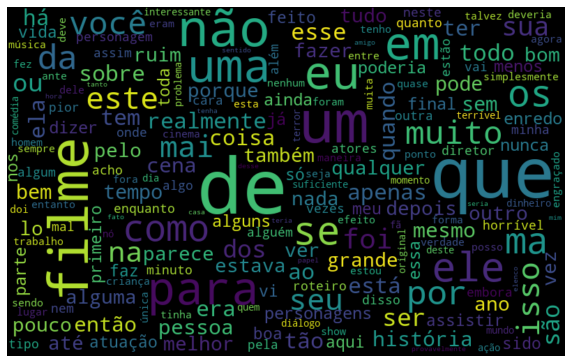

In [81]:
generate_word_cloud(
    reviews[reviews['sentiment'] == 'neg']['text_pt'])

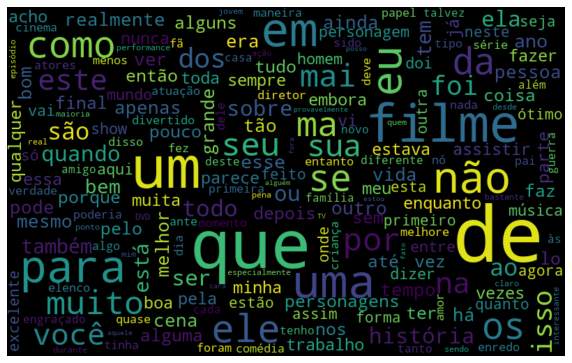

In [82]:
generate_word_cloud(
    reviews[reviews['sentiment'] == 'pos']['text_pt'])

In [83]:
import nltk

In [92]:
all_words = ' '.join([ text.lower() for text in reviews['text_pt'] ]).split()

In [94]:
frequencia = nltk.FreqDist(all_words)

In [97]:
frequencia

FreqDist({'de': 422154, 'que': 327261, 'e': 311782, 'o': 289805, 'a': 241726, 'um': 225146, 'é': 208453, 'não': 142163, 'em': 140213, 'uma': 136215, ...})

In [108]:
df_freq = pd.DataFrame({
    'word': list(frequencia.keys()),
    'frequency': list(frequencia.values())
})

In [109]:
df_freq

,word,frequency
0,mais,55117
1,uma,136215
2,"vez,",1929
3,o,289805
4,sr.,1836
...,...,...
312119,"muppified,",1
312120,inventora,1
312121,"""union",1
312122,beirar,1


In [110]:
import seaborn as sns

In [ ]:
df_sliced = df_freq.nlargest(n = 30, columns='frequency')

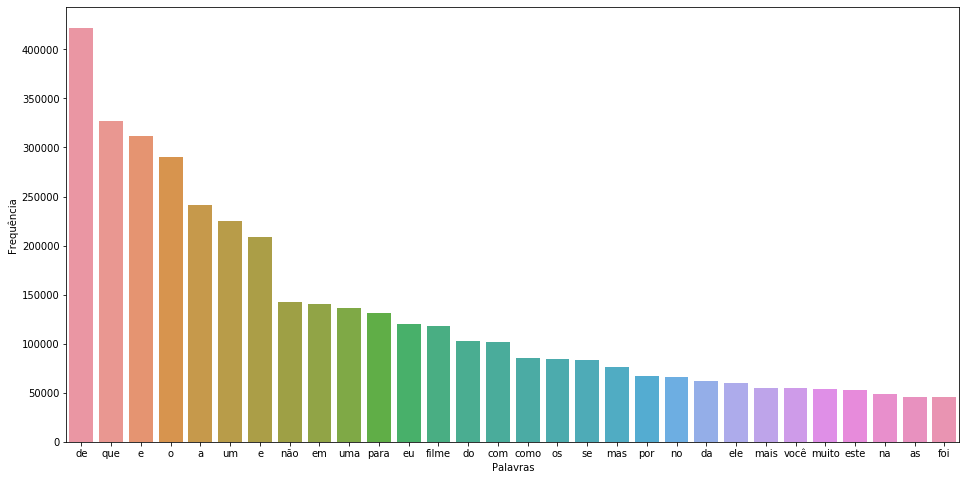

In [119]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=df_sliced, x='word', y='frequency')
ax.set(xlabel = 'Palavras')
ax.set(ylabel = 'Frequência')
plt.show()

# Course 2

In [1]:
import pandas as pd

In [2]:
reviews = pd.read_csv('imdb-reviews-pt-br.csv')

In [3]:
reviews.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
from nltk import tokenize

In [11]:
token_pontuacao = tokenize.WordPunctTokenizer()

In [13]:
from string import punctuation

In [14]:
punctuation_list = list(punctuation)

In [15]:
from nltk.corpus import stopwords

In [37]:
stop_words = stopwords.words('portuguese')
stop_words

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [40]:
import unidecode

In [38]:
stop_words_without_accent = [unidecode.unidecode(word) for word in stop_words]
stop_words_without_accent

['de',
 'a',
 'o',
 'que',
 'e',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'nao',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'a',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'ja',
 'eu',
 'tambem',
 'so',
 'pelo',
 'pela',
 'ate',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voce',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'as',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nos',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voces',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'esta',
 'estamos',
 'estao',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estavamos',
 'estavam',
 'estivera'

In [39]:
stop_words = stop_words + punctuation_list + stop_words_without_accent
stop_words

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

É necessário retirar a pontuação, pois mesmo usando o CountVectorizer para realizar a representação em Bag of Words, nós criamos a função pareto, que por sua vez não remove a pontuação automaticamente. Portanto, para que o pareto represente a frequência das palavras, o mais próximo possível da frequência da representação Bag of W\ords é importante remover as pontuações do nosso corpus.

In [131]:
processed_phrases = list()
for review in reviews['text_pt']:
    new_phrase = list()
    tokens = token_pontuacao.tokenize(review)
    new_phrase = [stemmer.stem(unidecode.unidecode(token).lower()) for token in tokens if token not in stop_words]
    #for token in tokens:
    #    new_phrase = [token if token not in stop_words]
    processed_phrases.append(' '.join(new_phrase))

In [135]:
len(processed_phrases)

49459

In [136]:
processed_phrases

['mais vez sr costn arrum film temp necessari alem terri sequenc resgat mar qual pouc simples import nenhum person a maior fantasm armari person cost realiz log inici esquec tard import o person deveri import arrog superconfi ashton kutch o problem sai garot pens melhor qualqu outr pesso redor mostr sinal armari desorden seu unic obstacul parec est venc costn final bem alem mei caminh costn cont sobr fantasm kutch som inform kutch lev ser melhor pressent pressagi anteri nenhum magic aqu tud pod faz deslig hor',
 'est exempl motiv maior film aca mesm gener chat nad valh pen assist aqu um complet desperdici talent ice t cub gel mal aproveit cad comprov capaz atu agir bem nao incomod va ver new jack city ricochet assist new york undercov ice t boyz hood high learning friday ice cub ver negoci real ice ts horri clich dialog so faz film ral dent aind pergunt diab bill paxton faz nest film e diab sempr interpret exat person do extraterrestr di tod film vi bill paxton fiz interpret exat perso

In [137]:
df['clean_text'] = processed_phrases

In [161]:
df.head()

,id,text_en,text_pt,sentiment,class,clean_text
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,mais vez sr costn arrum film temp necessari al...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,est exempl motiv maior film aca mesm gener cha...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,nem beatl pud escrev music tod gost emb walt h...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,film fot lata palavr apropri verdad tant ous s...


## Removing the accents
Using the library unidecode to clean the accents (applying above)

In [160]:
df['clean_text'][1]

'est exempl motiv maior film aca mesm gener chat nad valh pen assist aqu um complet desperdici talent ice t cub gel mal aproveit cad comprov capaz atu agir bem nao incomod va ver new jack city ricochet assist new york undercov ice t boyz hood high learning friday ice cub ver negoci real ice ts horri clich dialog so faz film ral dent aind pergunt diab bill paxton faz nest film e diab sempr interpret exat person do extraterrestr di tod film vi bill paxton fiz interpret exat person irrit menos ali person morr torn pouc gratific ... no geral lix aca segund cl exist inconta    film melhor ver real quis ver film assist judgment night pratic cop carbon melhor atuaca rot melhor a unic cois fez val pen assist mao decent cam cinematograf quas refresc cheg pert compens horri film si bem assim 4 10'

In [27]:
import unidecode

In [28]:
frase = 'péssimo é tão único tão são'
frase_limpa = unidecode.unidecode(frase)
frase_limpa

'pessimo e tao unico tao sao'

## Using Stemmer

In [126]:
from nltk import RSLPStemmer

In [128]:
stemmer = RSLPStemmer()

In [130]:
stemmer.stem('corrimão')

'corrim'

## Using TF-IDF 
A principal característica do TF-IDF é ser uma pontuação proporcional à frequência da palavra no texto e equilibrada pela frequência no corpus, ou seja, palavras que se repetem muito em todo o corpus tendem a ter pontuações menores. Embora o Ngrams seja um método que pode otimizar o seu resultado devemos ter cuidado, já que ao utilizá-lo o nosso vetor Bag of Words aumenta consideravelmente de tamanho, o que também faz com que o custo computacional aumente.

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [171]:
frases = ['Assisti um ótimo filme',
         'Assisti um filme péssimo',
         'Vi um filme ruim']

In [172]:
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

In [173]:
features = tfidf.fit_transform(frases)

In [174]:
df_tfidf = pd.DataFrame(features.todense(), 
                       columns=tfidf.get_feature_names())
df_tfidf

,Assisti,Vi,filme,péssimo,ruim,um,ótimo
0,0.504107,0.000000,0.391484,0.00000,0.000000,0.391484,0.66284
1,0.504107,0.000000,0.391484,0.66284,0.000000,0.391484,0.00000
2,0.000000,0.608845,0.359594,0.00000,0.608845,0.359594,0.00000


In [180]:
features

<49459x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 3445610 stored elements in Compressed Sparse Row format>